**@author: James V. Talwar**

# Validation Set Analysis: Autoimmune Alleles and Age of Diagnosis

**About:** This notebook provides the code needed to generate Figure 1G and Supplementary Figure 9 from the paper [*Autoimmune Alleles at the Major Histocompatibility Locus Modify Melanoma Susceptibility*](https://www.biorxiv.org/content/10.1101/2021.08.12.456166v1.full). These analyses evaluated MHC-I autoimmune allele status in the validation set (N=586).

## 1. Import Packages and Load in Preprocessed Data

In [1]:
import pandas as pd
from collections import defaultdict
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from scipy.stats import mannwhitneyu
import statsmodels.formula.api as smf
import string

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
validationSetStatus = pd.read_csv("../GenotypeData/Validation_All.tsv", sep = "\t", index_col = 0) #contains AI/Non-AI allele status, sex, and age information for the validation set
print("Number of validation cohort individuals: {}".format(validationSetStatus.shape[0]))

Number of validation cohort individuals: 586


## 2. Generate Figures

### a. Figure 1G

Statistic = 35791.000, p= 0.04351306
Different distribution (reject H0)


Text(0.5, 0, 'Has Autoimmune Allele')

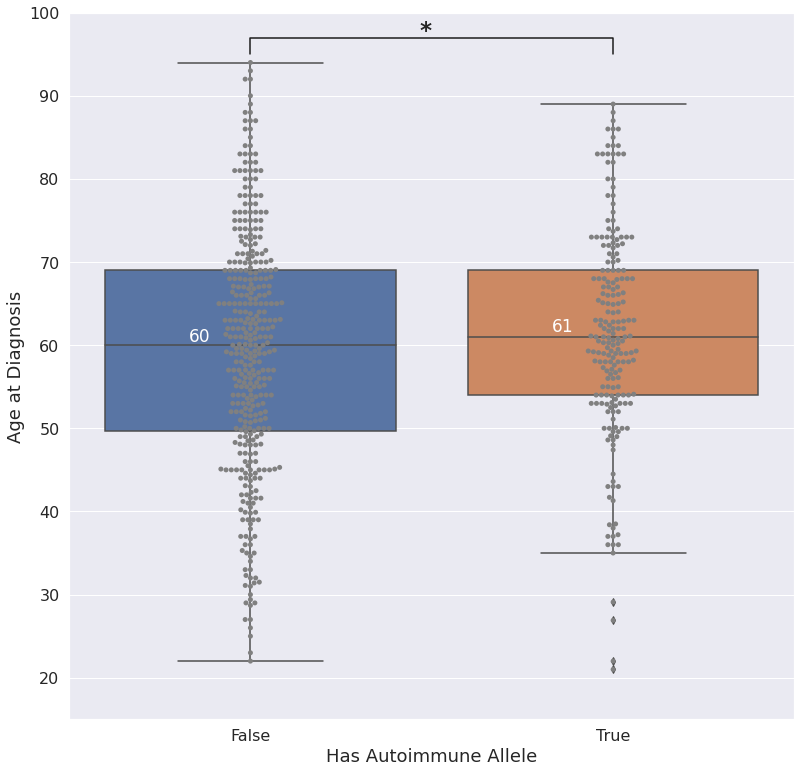

In [3]:
sns.set(font_scale = 1.1)
plt.figure(figsize=(13,13))

stat,p = mannwhitneyu(list(pd.to_numeric(validationSetStatus[validationSetStatus["HasProtection"]]["Age at Diagnosis"])), list(pd.to_numeric(validationSetStatus[validationSetStatus["HasProtection"]==False]["Age at Diagnosis"])))
print('Statistic = %.3f, p= %.8f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

sns.boxplot(data = validationSetStatus, x = 'HasProtection', y = pd.to_numeric(validationSetStatus['Age at Diagnosis']))
sns.swarmplot(data = validationSetStatus, x = 'HasProtection', y = pd.to_numeric(validationSetStatus['Age at Diagnosis']), color = 'grey')
plt.ylim(17, 103)

plt.xlabel("Has Autoimmune Allele", fontsize = 15)
plt.ylabel("Age at Diagnosis", fontsize = 15)

plt.text(-.17, 60.5, str(int(np.median(validationSetStatus[(validationSetStatus["HasProtection"] == False)]["Age at Diagnosis"]))), color = "white", fontsize = 17)
plt.text(0.83, 61.7, str(int(np.median(validationSetStatus[validationSetStatus["HasProtection"]]["Age at Diagnosis"]))), color = "white", fontsize = 17)
plt.plot([0,0,1,1], [95, 97, 97, 95], lw = 1.5, c = 'k')
plt.text(0.465, 97, "*", fontsize = 23, fontweight = "bold")
plt.ylim(15,100)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel("Age at Diagnosis", fontsize = 18)
plt.xlabel("Has Autoimmune Allele", fontsize = 18)

In [4]:
validationSetStatus.HasProtection.value_counts() 

False    380
True     206
Name: HasProtection, dtype: int64

Regression analysis: $$ AgeOfDiagnosis \sim AI Status + Sex $$

In [5]:
valModel = smf.ols(formula= 'Q("Age at Diagnosis") ~ HasProtection + Sex', data=validationSetStatus).fit() 
summary = valModel.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,57.9013,0.919,63.028,0.000,56.097,59.706
HasProtection[T.True],2.0960,1.202,1.744,0.082,-0.265,4.457
Sex[T.M],2.5438,1.149,2.214,0.027,0.288,4.800


In [6]:
print("The regression coefficient AI allele carrier status in the validation set (N = {0}) is {1:.3f} with a p-value of {2:.3f}".format(validationSetStatus.shape[0],valModel.params["HasProtection[T.True]"], valModel.pvalues["HasProtection[T.True]"]))

The regression coefficient AI allele carrier status in the validation set (N = 586) is 2.096 with a p-value of 0.082


### b. Supplementary Figure 9A

In [7]:
validationPlottingVisualization = validationSetStatus.copy()
validationPlottingVisualization["Age at Diagnosis"] = validationPlottingVisualization["Age at Diagnosis"].apply(np.round)

Statistic = 37290.000, p= 0.00329156
Different distribution (reject H0)


(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

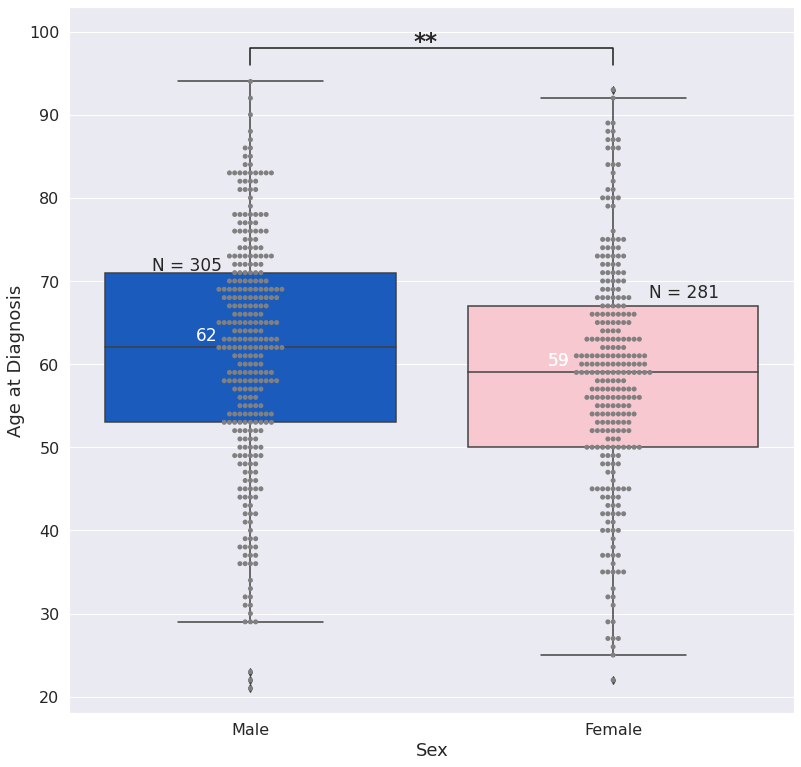

In [8]:
skittlesTasteTheRainbow = {"M":'#0056D6' , "F":"#FFC0CB"} #palette for color by sex 
stat,p = mannwhitneyu(list(pd.to_numeric(validationPlottingVisualization[validationPlottingVisualization["Sex"] == "M"]["Age at Diagnosis"])), list(pd.to_numeric(validationPlottingVisualization[validationPlottingVisualization["Sex"]=="F"]["Age at Diagnosis"])))

print('Statistic = %.3f, p= %.8f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

plt.figure(figsize=(13,13))
sns.boxplot(data = validationPlottingVisualization, x = "Sex", y="Age at Diagnosis", palette = skittlesTasteTheRainbow)
sns.swarmplot(data = validationPlottingVisualization, x = "Sex", y="Age at Diagnosis", dodge= True, color = "grey")

plt.xlabel("Sex", fontsize = 18)
plt.ylabel("Age at Diagnosis", fontsize = 18)
plt.xticks([0, 1], ["Male", "Female"])
plt.yticks(fontsize=14)
plt.ylim(18, 103)

plt.text(-.15, 62.9, str(int(np.median(validationPlottingVisualization[(validationPlottingVisualization["Sex"] == "M")]["Age at Diagnosis"]))), color = "white", fontsize=17)
plt.text(.82, 59.9, str(int(np.median(validationPlottingVisualization[validationPlottingVisualization["Sex"] == "F"]["Age at Diagnosis"]))), color = "white", fontsize = 17)
plt.text(-.27, 71.3, f'N = {validationPlottingVisualization.Sex.value_counts()["M"]}', fontsize=17)
plt.text(.82, 59.9, str(int(np.median(validationPlottingVisualization[validationPlottingVisualization["Sex"] == "F"]["Age at Diagnosis"]))), color = "white", fontsize = 17)
plt.text(1.1, 68, f'N = {validationPlottingVisualization.Sex.value_counts()["F"]}', fontsize=17)


plt.plot([0,0,1,1], [96, 98, 98, 96], lw = 1.5, c = 'k')
plt.text(0.45, 98, "**", fontsize = 23, fontweight = "bold")

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

In [9]:
validationPlottingVisualization["Sex"].value_counts()

M    305
F    281
Name: Sex, dtype: int64

### c. Supplementary Figure 9B

Running mann-whitney for AI alleles in FEMALES...: 


Statistic = 8280.000, p= 0.236


Running mann-whitney for AI alleles in MALES...: 


Statistic = 9662.000, p= 0.055


Text(1.09, 91.5, 'N = 93')

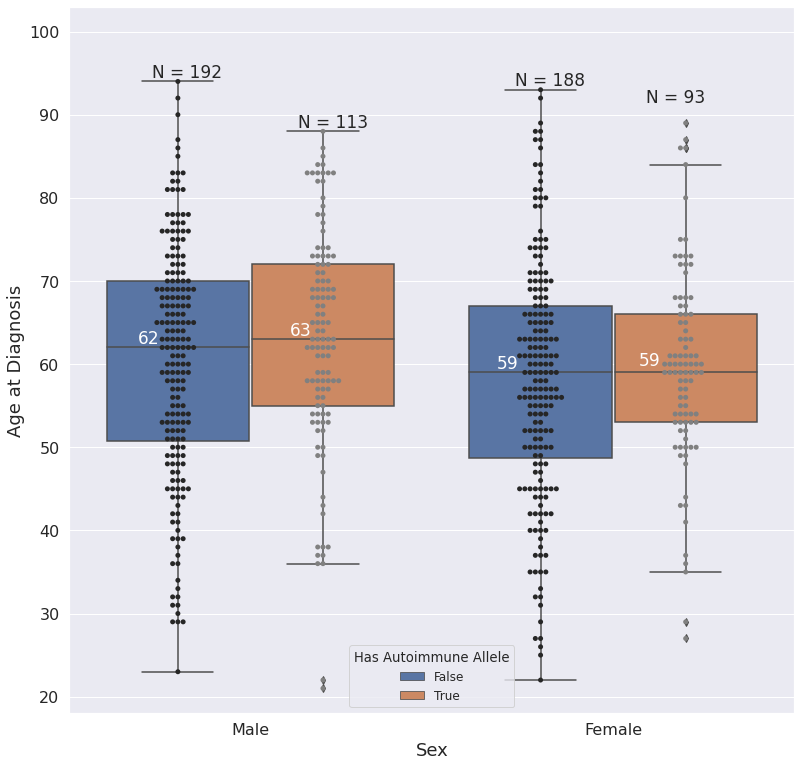

In [10]:
print("Running mann-whitney for AI alleles in FEMALES...: ")

stat,pFemale = mannwhitneyu(validationPlottingVisualization[(validationPlottingVisualization["Sex"] == "F")&(validationPlottingVisualization["HasProtection"])]["Age at Diagnosis"], validationPlottingVisualization[(validationPlottingVisualization["Sex"] == "F")&(validationPlottingVisualization["HasProtection"] == False)]["Age at Diagnosis"])
print("\n")
print('Statistic = %.3f, p= %.3f' % (stat, pFemale))

print("\n")

print("Running mann-whitney for AI alleles in MALES...: ")

stat,pMale = mannwhitneyu(validationPlottingVisualization[(validationPlottingVisualization["Sex"] == "M")&(validationPlottingVisualization["HasProtection"])]["Age at Diagnosis"], validationPlottingVisualization[(validationPlottingVisualization["Sex"] == "M")&(validationPlottingVisualization["HasProtection"] == False)]["Age at Diagnosis"])
print("\n")
print('Statistic = %.3f, p= %.3f' % (stat, pMale))

plt.figure(figsize=(13,13))
ax = sns.boxplot(data = validationPlottingVisualization, hue = "HasProtection", y = "Age at Diagnosis", x = "Sex")
sns.swarmplot(data = validationPlottingVisualization, hue = "HasProtection", y="Age at Diagnosis", x = "Sex", dodge= True, color = "grey")

plt.xlabel("Sex", fontsize = 18)
plt.ylabel("Age at Diagnosis", fontsize = 18)
plt.xticks([0, 1], ["Male", "Female"], fontsize = 16)
plt.yticks(fontsize=16)
plt.ylim(18,103)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title = "Has Autoimmune Allele", loc = 8)

plt.text(-0.31, 62.5, int(np.median(validationPlottingVisualization[(validationPlottingVisualization["Sex"] =="M") & (validationPlottingVisualization["HasProtection"] == False)]["Age at Diagnosis"])), color = "white", fontsize=17)
plt.text(-0.27, 94.5, f'N = {validationPlottingVisualization[(validationPlottingVisualization["Sex"] =="M") & (validationPlottingVisualization["HasProtection"] == False)].shape[0]}', fontsize=17)

plt.text(0.11, 63.5, int(np.median(validationPlottingVisualization[(validationPlottingVisualization["Sex"] =="M") & (validationPlottingVisualization["HasProtection"])]["Age at Diagnosis"])), color = "white", fontsize=17)
plt.text(0.13, 88.5, f'N = {validationPlottingVisualization[(validationPlottingVisualization["Sex"] =="M") & (validationPlottingVisualization["HasProtection"])].shape[0]}', fontsize=17)


plt.text(0.68, 59.5, int(np.median(validationPlottingVisualization[(validationPlottingVisualization["Sex"] =="F") & (validationPlottingVisualization["HasProtection"] == False)]["Age at Diagnosis"])), color = "white", fontsize=17)
plt.text(0.73, 93.5, f'N = {validationPlottingVisualization[(validationPlottingVisualization["Sex"] =="F") & (validationPlottingVisualization["HasProtection"] == False)].shape[0]}', fontsize=17)

plt.text(1.07, 59.9, int(np.median(validationPlottingVisualization[(validationPlottingVisualization["Sex"] =="F") & (validationPlottingVisualization["HasProtection"])]["Age at Diagnosis"])), color = "white", fontsize=17)
plt.text(1.09, 91.5, f'N = {validationPlottingVisualization[(validationPlottingVisualization["Sex"] =="F") & (validationPlottingVisualization["HasProtection"])].shape[0]}', fontsize=17)


### d. Supplementary Figure 9 (Composite Figure):

Text(-0.75, 105, 'B')

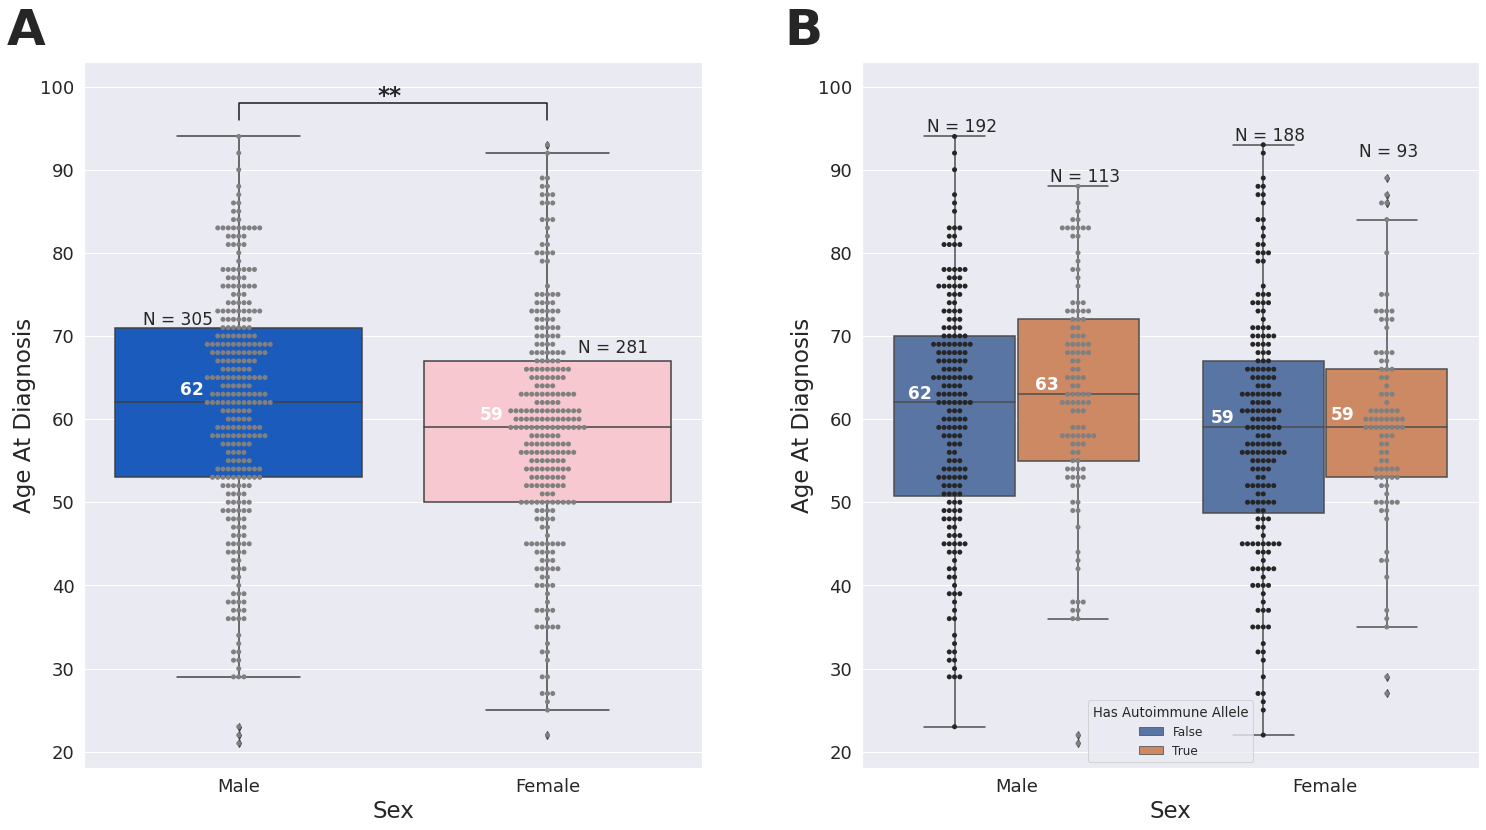

In [11]:
plt.figure(figsize = (25,13))
gs = gridspec.GridSpec(1, 4)
gs.update(wspace=0.7)
ax1 = plt.subplot(gs[0, :2], )
ax2 = plt.subplot(gs[0, 2:])

#Sex and age of diagnosis 
sns.boxplot(data = validationPlottingVisualization, x = "Sex", y="Age at Diagnosis", palette = skittlesTasteTheRainbow, ax = ax1)
sns.swarmplot(data = validationPlottingVisualization, x = "Sex", y="Age at Diagnosis", dodge= True, color = "grey", ax = ax1)

ax1.set_xlabel("Sex", fontsize = 23)
ax1.set_ylabel("Age At Diagnosis", fontsize = 23)
ax1.set_xticklabels(["Male", "Female"])

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(18)

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)


ax1.set_ylim(18, 103)

ax1.text(-.19, 62.9, str(int(np.median(validationPlottingVisualization[(validationPlottingVisualization["Sex"] == "M")]["Age at Diagnosis"]))), color = "white", fontsize = 17, weight = "bold")
ax1.text(.78, 59.9, str(int(np.median(validationPlottingVisualization[validationPlottingVisualization["Sex"] == "F"]["Age at Diagnosis"]))), color = "white", fontsize = 17, weight = "bold")
ax1.text(-.31, 71.3, f'N = {validationPlottingVisualization.Sex.value_counts()["M"]}', fontsize=17)
ax1.text(1.1, 68, f'N = {validationPlottingVisualization.Sex.value_counts()["F"]}', fontsize=17)


ax1.plot([0,0,1,1], [96, 98, 98, 96], lw = 1.5, c = 'k')
ax1.text(0.45, 98, "**", fontsize = 23, fontweight = "bold")

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

ax1.text(-0.75, 105, string.ascii_uppercase[0], size=50, weight='bold')

#Sex, AI status, and age of diagnosis:
sns.boxplot(data = validationPlottingVisualization, hue = "HasProtection", y = "Age at Diagnosis", x = "Sex", ax = ax2)
sns.swarmplot(data = validationPlottingVisualization, hue = "HasProtection", y="Age at Diagnosis", x = "Sex", dodge= True, color = "grey", ax = ax2)

ax2.set_xlabel("Sex", fontsize = 23)
ax2.set_ylabel("Age At Diagnosis", fontsize = 23)
ax2.set_xticklabels(["Male", "Female"])

for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(18)

for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)

ax2.set_ylim(18,103)

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[:2], labels[:2], title = "Has Autoimmune Allele", loc = 8)

ax2.text(-0.35, 62.5, int(np.median(validationPlottingVisualization[(validationPlottingVisualization["Sex"] =="M") & (validationPlottingVisualization["HasProtection"] == False)]["Age at Diagnosis"])), color = "white", fontsize=17, weight = "bold")
ax2.text(-0.29, 94.5, f'N = {validationPlottingVisualization[(validationPlottingVisualization["Sex"] =="M") & (validationPlottingVisualization["HasProtection"] == False)].shape[0]}', fontsize=17)

ax2.text(0.06, 63.5, int(np.median(validationPlottingVisualization[(validationPlottingVisualization["Sex"] =="M") & (validationPlottingVisualization["HasProtection"])]["Age at Diagnosis"])), color = "white", fontsize=17, weight = "bold")
ax2.text(0.11, 88.5, f'N = {validationPlottingVisualization[(validationPlottingVisualization["Sex"] =="M") & (validationPlottingVisualization["HasProtection"])].shape[0]}', fontsize=17)

ax2.text(0.63, 59.5, int(np.median(validationPlottingVisualization[(validationPlottingVisualization["Sex"] =="F") & (validationPlottingVisualization["HasProtection"] == False)]["Age at Diagnosis"])), color = "white", fontsize=17, weight = "bold")
ax2.text(0.71, 93.5, f'N = {validationPlottingVisualization[(validationPlottingVisualization["Sex"] =="F") & (validationPlottingVisualization["HasProtection"] == False)].shape[0]}', fontsize=17)

ax2.text(1.02, 59.9, int(np.median(validationPlottingVisualization[(validationPlottingVisualization["Sex"] =="F") & (validationPlottingVisualization["HasProtection"])]["Age at Diagnosis"])), color = "white", fontsize=17, weight = "bold")
ax2.text(1.11, 91.5, f'N = {validationPlottingVisualization[(validationPlottingVisualization["Sex"] =="F") & (validationPlottingVisualization["HasProtection"])].shape[0]}', fontsize=17)

ax2.text(-0.75, 105, string.ascii_uppercase[1], size=50, weight='bold')